In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVR
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform, RandomNormal, Zeros
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Preprocessing


In [2]:
diamonds_df = pd.read_csv("diamonds.csv")
diamonds_df=diamonds_df.drop('Unnamed: 0', axis=1)
#Check for missing values and If there are any missing values, drop the rows
diamonds_df.isnull().sum()
diamonds_df.dropna(inplace=True)
#Map the categorical data to integers for cut, color & clarity
diamonds_df['cut'] = diamonds_df['cut'].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
diamonds_df['color'] = diamonds_df['color'].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diamonds_df['clarity'] = diamonds_df['clarity'].map({'I1': 0, 'SI1': 1, 'SI2': 2, 'VS1': 3, 'VS2': 4, 'VVS1': 5, 'VVS2': 6, 'IF': 7})

y = diamonds_df['price']
X = diamonds_df.drop('price', axis=1)

# Split into train and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
# Split trainval set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.33,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [3]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print(X.head())

   carat  cut  color  clarity  depth  table     x     y     z
0   0.23    4      1        2   61.5   55.0  3.95  3.98  2.43
1   0.21    3      1        1   59.8   61.0  3.89  3.84  2.31
2   0.23    1      1        3   56.9   65.0  4.05  4.07  2.31
3   0.29    3      5        4   62.4   58.0  4.20  4.23  2.63
4   0.31    1      6        2   63.3   58.0  4.34  4.35  2.75


In [5]:
print(y.head())

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


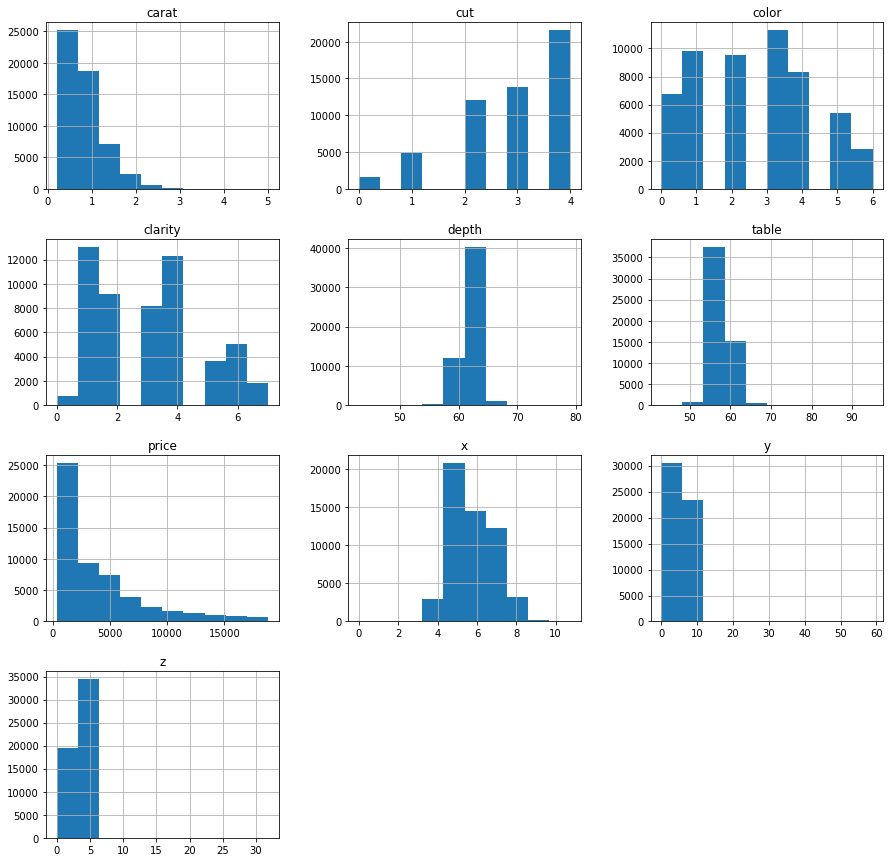

In [6]:
diamonds_df.hist(figsize=(15,15))
plt.show()

# Learning Models

## Linear Regression

Linear Regression:
Mean absolute error: 843.7189641060797
R2 score: 0.882143275970175


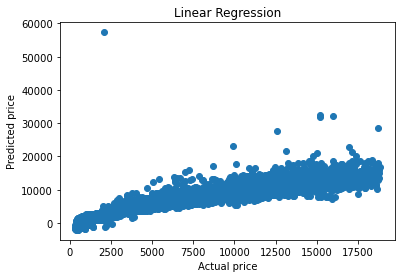

In [7]:
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print('Mean absolute error:', mae)
print('R2 score:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Linear Regression")
plt.show()

## Neural Network

Epoch 1/50
847/847 [==============================] - 2s 1ms/step - loss: 26335824.0000 - val_loss: 9380533.0000
Epoch 2/50
847/847 [==============================] - 1s 1ms/step - loss: 7319230.5000 - val_loss: 3494046.2500
Epoch 3/50
847/847 [==============================] - 1s 1ms/step - loss: 6046757.0000 - val_loss: 2800644.7500
Epoch 4/50
847/847 [==============================] - 1s 1ms/step - loss: 5667125.5000 - val_loss: 2567088.5000
Epoch 5/50
847/847 [==============================] - 1s 1ms/step - loss: 5556958.0000 - val_loss: 2528179.0000
Epoch 6/50
847/847 [==============================] - 1s 1ms/step - loss: 5443317.5000 - val_loss: 2409507.2500
Epoch 7/50
847/847 [==============================] - 1s 1ms/step - loss: 5327658.5000 - val_loss: 2555458.0000
Epoch 8/50
847/847 [==============================] - 1s 1ms/step - loss: 5473989.5000 - val_loss: 2385351.2500
Epoch 9/50
847/847 [==============================] - 1s 1ms/step - loss: 5492473.0000 - val_loss: 2279

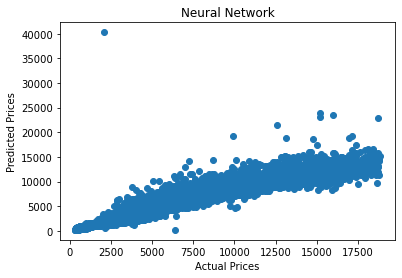

In [8]:
# Build the neural network
model = keras.Sequential([
    keras.layers.Dense(units=9, activation='linear'),
    keras.layers.Dense(units=6, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=3, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1, activation='linear')
])
#opt = keras.optimizers.Adam(learning_rate=0.001)
#nn_model.compile(optimizer=opt, loss='mean_squared_error')
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

model.save('diamond_price_prediction_model.h5')

test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Neural Network:")
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

# Plot the actual and predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Neural Network")
plt.show()

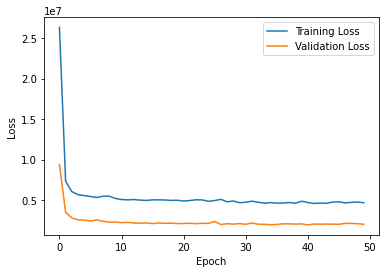

In [9]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Support Vector Machine

Mean Absolute Error: 897.8454664101046
R2 Score: 0.8410213259144209


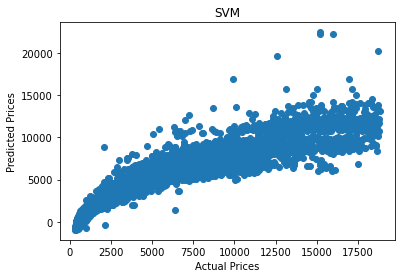

In [10]:
# create an SVR model
model = SVR(kernel='linear', epsilon=0.02, C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

# Plot the actual and predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("SVM")
plt.show()

## Parameter Tuning

Epoch 1/10


C:\Users\Neg\AppData\Local\Temp\ipykernel_15296\3560794845.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10)


678/678 [==============================] - 1s 811us/step - loss: 31579644.0000
Epoch 2/10
678/678 [==============================] - 1s 978us/step - loss: 29456060.0000
Epoch 3/10
678/678 [==============================] - 1s 963us/step - loss: 23715284.0000
Epoch 4/10
678/678 [==============================] - 1s 802us/step - loss: 16486989.0000
Epoch 5/10
678/678 [==============================] - 1s 785us/step - loss: 11945470.0000
Epoch 6/10
678/678 [==============================] - 1s 813us/step - loss: 9695966.0000
Epoch 7/10
678/678 [==============================] - 1s 916us/step - loss: 9232026.0000
Epoch 8/10
678/678 [==============================] - 1s 777us/step - loss: 8525205.0000
Epoch 9/10
678/678 [==============================] - 1s 813us/step - loss: 8067783.5000
Epoch 10/10
170/170 [==============================] - 0s 591us/step
Epoch 1/10
678/678 [==============================] - 1s 813us/step - loss: 31942866.0000
Epoch 2/10
678/678 [==========================

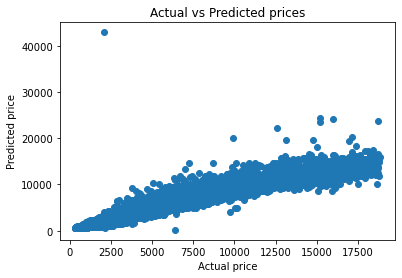

In [14]:
def create_model(num_hidden_layers, num_units, kernel_initializer, activation,dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(9, kernel_initializer=kernel_initializer, activation=activation ))
    for i in range(num_hidden_layers):
        model.add(Dense(num_units, kernel_initializer=kernel_initializer, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=kernel_initializer))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=10)

param_grid = {
    'num_hidden_layers': [1, 2],
    'num_units': [3, 4, 5, 6],
    'kernel_initializer': ['RandomUniform', 'RandomNormal', 'Zeros'],
    'activation': ['relu', 'tanh']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(r2_score), refit='r2_score')
grid_result = grid.fit(X_train, y_train)

print("Best score:", grid_result.best_score_, ", by using: ", grid_result.best_params_)

# Train and evaluate the model using the best parameters found by GridSearchCV
best_model = create_model(**grid_result.best_params_)
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
test_loss = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("r2 score:", r2)

# Plot the actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted prices")
plt.show()

In [15]:
results = pd.DataFrame(grid_result.cv_results_)
results[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'activation': 'relu', 'kernel_initializer': '...",0.474191,13
1,"{'activation': 'relu', 'kernel_initializer': '...",0.881267,8
2,"{'activation': 'relu', 'kernel_initializer': '...",0.890810,5
3,"{'activation': 'relu', 'kernel_initializer': '...",0.894781,4
4,"{'activation': 'relu', 'kernel_initializer': '...",0.113303,16
5,"{'activation': 'relu', 'kernel_initializer': '...",0.503714,12
6,"{'activation': 'relu', 'kernel_initializer': '...",0.856974,11
7,"{'activation': 'relu', 'kernel_initializer': '...",0.896242,3
8,"{'activation': 'relu', 'kernel_initializer': '...",0.873359,9
9,"{'activation': 'relu', 'kernel_initializer': '...",0.137857,15


## Clustering

In [16]:
# Cluster diamonds using K-means
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit(X).predict(X)

diamonds_df['cluster'] = labels

# average price of diamonds in each cluster
avg_prices = diamonds_df.groupby('cluster')['price'].mean()
avg_prices

cluster
0    1974.456452
1    3950.056897
2    7527.264522
3    2848.119185
Name: price, dtype: float64